In [291]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '6efb5c72-f589-4786-86d6-d6cedd9c2c6f',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

{'status': {'timestamp': '2024-01-25T07:05:47.698Z', 'error_code': 0, 'error_message': None, 'elapsed': 65, 'credit_count': 25, 'notice': None, 'total_count': 8786}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10783, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [268]:
type(data)

dict

In [269]:
import pandas as pd

In [292]:
pd.json_normalize(data['status'])

timestamp  error_code error_message  elapsed  credit_count  \
0  2024-01-25T07:05:47.698Z           0          None       65            25   

  notice  total_count  
0   None         8786

In [293]:
pd.json_normalize(data['data'])
#pd.set_option('display.max.columns', None)

id               name  symbol         slug  num_market_pairs  \
0         1            Bitcoin     BTC      bitcoin             10783   
1      1027           Ethereum     ETH     ethereum              8326   
2       825        Tether USDt    USDT       tether             72945   
3      1839                BNB     BNB          bnb              2034   
4      5426             Solana     SOL       solana               618   
...     ...                ...     ...          ...               ...   
4995  23024          TCG Verse    TCGC         tcgc                10   
4996  17336  Apollo Crypto DAO  APOLLO   apollo-inu                 3   
4997  29110             USDEBT  USDEBT  usdebt-meme                 1   
4998  23895            PodFast    FAST      podfast                11   
4999  11495               Tomb    TOMB         tomb               137   

                    date_added  \
0     2010-07-13T00:00:00.000Z   
1     2015-08-07T00:00:00.000Z   
2     2015-02-25T00:00:00.000Z   
3     2017-07-25T00:00:00.000Z   
4     2020-04-10T00:00:00.000Z   
...                        ...   
4995  2022-12-19T14:06:58.000Z   
4996  2022-01-15T10:11:37.000Z   
4997  2024-01-22T10:54:05.000Z   
4998  2023-03-13T10:31:15.000Z   
4999  2021-08-30T14:40:21.000Z   

                                                   tags           max_supply  \
0     [mineable, pow, sha-256, store-of-value, state...       21000000.00000   
1     [pos, smart-contracts, ethereum-ecosystem, coi...                  NaN   
2     [payments, stablecoin, asset-backed-stablecoin...                  NaN   
3     [marketplace, centralized-exchange, payments, ...                  NaN   
4     [pos, platform, solana-ecosystem, cms-holdings...                  NaN   
...                                                 ...                  ...   
4995                                                 []      100000000.00000   
4996                            [dao, doggone-doggerel]  2000000000000.00000   
4997                                                 [] 32000000000000.00000   
4998                                                 []      100000000.00000   
4999                    [seigniorage, fantom-ecosystem]                  NaN   

      circulating_supply      total_supply  ...  quote.USD.market_cap  \
0         19607937.00000          19607937  ...    784435240166.94104   
1        120180142.56976   120180142.56976  ...    266847590247.75839   
2      95554092990.82228 98600769244.08264  ...     95504312758.22412   
3        149548069.63795   149548069.63795  ...     43360663966.70516   
4        433135725.59808   567890981.29845  ...     38266646531.13097   
...                  ...               ...  ...                   ...   
4995             0.00000           5000000  ...               0.00000   
4996             0.00000     2000000000000  ...               0.00000   
4997             0.00000    32000000000000  ...               0.00000   
4998             0.00000          30550471  ...               0.00000   
4999             0.00000   309176853.13510  ...               0.00000   

      quote.USD.market_cap_dominance  quote.USD.fully_diluted_market_cap  \
0                           50.39270                  840126120535.05005   
1                           17.14250                  266847590247.76001   
2                            6.14050                   98549401803.14999   
3                            2.78610                   43360663966.71000   
4                            2.45830                   50171994978.15000   
...                              ...                                 ...   
4995                         0.00000                       6807306.38000   
4996                         0.00000                       7202906.53000   
4997                         0.00000                       1735205.69000   
4998                         0.00000                       4540242.32000   
4999                         0.00000             

In [302]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

id               name  symbol         slug  num_market_pairs  \
0         1            Bitcoin     BTC      bitcoin             10783   
1      1027           Ethereum     ETH     ethereum              8326   
2       825        Tether USDt    USDT       tether             72945   
3      1839                BNB     BNB          bnb              2034   
4      5426             Solana     SOL       solana               618   
...     ...                ...     ...          ...               ...   
4995  23024          TCG Verse    TCGC         tcgc                10   
4996  17336  Apollo Crypto DAO  APOLLO   apollo-inu                 3   
4997  29110             USDEBT  USDEBT  usdebt-meme                 1   
4998  23895            PodFast    FAST      podfast                11   
4999  11495               Tomb    TOMB         tomb               137   

                    date_added  \
0     2010-07-13T00:00:00.000Z   
1     2015-08-07T00:00:00.000Z   
2     2015-02-25T00:00:00.000Z   
3     2017-07-25T00:00:00.000Z   
4     2020-04-10T00:00:00.000Z   
...                        ...   
4995  2022-12-19T14:06:58.000Z   
4996  2022-01-15T10:11:37.000Z   
4997  2024-01-22T10:54:05.000Z   
4998  2023-03-13T10:31:15.000Z   
4999  2021-08-30T14:40:21.000Z   

                                                   tags           max_supply  \
0     [mineable, pow, sha-256, store-of-value, state...       21000000.00000   
1     [pos, smart-contracts, ethereum-ecosystem, coi...                  NaN   
2     [payments, stablecoin, asset-backed-stablecoin...                  NaN   
3     [marketplace, centralized-exchange, payments, ...                  NaN   
4     [pos, platform, solana-ecosystem, cms-holdings...                  NaN   
...                                                 ...                  ...   
4995                                                 []      100000000.00000   
4996                            [dao, doggone-doggerel]  2000000000000.00000   
4997                                                 [] 32000000000000.00000   
4998                                                 []      100000000.00000   
4999                    [seigniorage, fantom-ecosystem]                  NaN   

      circulating_supply      total_supply  ...  \
0         19607937.00000          19607937  ...   
1        120180142.56976   120180142.56976  ...   
2      95554092990.82228 98600769244.08264  ...   
3        149548069.63795   149548069.63795  ...   
4        433135725.59808   567890981.29845  ...   
...                  ...               ...  ...   
4995             0.00000           5000000  ...   
4996             0.00000     2000000000000  ...   
4997             0.00000    32000000000000  ...   
4998             0.00000          30550471  ...   
4999             0.00000   309176853.13510  ...   

      quote.USD.market_cap_dominance  quote.USD.fully_diluted_market_cap  \
0                           50.39270                  840126120535.05005   
1                           17.14250                  266847590247.76001   
2                            6.14050                   98549401803.14999   
3                            2.78610                   43360663966.71000   
4                            2.45830                   50171994978.15000   
...                              ...                                 ...   
4995                         0.00000                       6807306.38000   
4996                         0.00000                       7202906.53000   
4997                         0.00000                       1735205.69000   
4998                         0.00000                       4540242.32000   
4999                         0.00000                       2081812.11000   

      quote.USD.tvl    quote.USD.last_updated  platform.id  \
0               NaN  2024-01-25T07:04:00.000Z          NaN   
1               NaN  2024-01-25T07:04:00.000Z          NaN   
2               NaN  2024-01-25T06:59:00.000Z   10

In [309]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'5000',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '6efb5c72-f589-4786-86d6-d6cedd9c2c6f',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df2,df_append])

In [ ]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed


In [36]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'5000',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '6efb5c72-f589-4786-86d6-d6cedd9c2c6f',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df2,df_append])
    
    if not os.path.isfile(r'C:\Users\Alza ahdiya f\Documents\alja\kerja\skill\Alex The Analyst\python\csv files\API.csv'):
        df.to_csv(r'C:\Users\Alza ahdiya f\Documents\alja\kerja\skill\Alex The Analyst\python\csv files\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\Alza ahdiya f\Documents\alja\kerja\skill\Alex The Analyst\python\csv files\API.csv', mode='a', header=False)

# If that didn't work try using the local host URL as shown in the video

In [37]:
try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    #print(data)

    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df2, df_append])

    if not os.path.isfile(r'C:\Users\Alza ahdiya f\Documents\alja\kerja\skill\Alex The Analyst\python\csv files\API.csv'):
        df.to_csv(r'C:\Users\Alza ahdiya f\Documents\alja\kerja\skill\Alex The Analyst\python\csv files\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\Alza ahdiya f\Documents\alja\kerja\skill\Alex The Analyst\python\csv files\API.csv', mode='a', header=False)

except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)


In [197]:
df72 = pd.read_csv(r'C:\Users\Alza ahdiya f\Documents\alja\kerja\skill\Alex The Analyst\python\csv files\API.csv')
df72

Unnamed: 0     id                                name     symbol  \
0               0      1                             Bitcoin        BTC   
1               1   1027                            Ethereum        ETH   
2               2    825                         Tether USDt       USDT   
3               3   1839                                 BNB        BNB   
4               4   5426                              Solana        SOL   
...           ...    ...                                 ...        ...   
59995        4995  29110                              USDEBT     USDEBT   
59996        4996  23895                             PodFast       FAST   
59997        4997  17336                   Apollo Crypto DAO     APOLLO   
59998        4998  19239  GameStop Tokenized Stock Defichain       DGME   
59999        4999  25694                        BlackSwan AI  BLACKSWAN   

                                     slug  num_market_pairs  \
0                                 bitcoin             10783   
1                                ethereum              8326   
2                                  tether             72940   
3                                     bnb              2034   
4                                  solana               618   
...                                   ...               ...   
59995                         usdebt-meme                 1   
59996                             podfast                11   
59997                          apollo-inu                 3   
59998  gamestop-tokenized-stock-defichain                 1   
59999                        blackswan-ai                 1   

                     date_added  \
0      2010-07-13T00:00:00.000Z   
1      2015-08-07T00:00:00.000Z   
2      2015-02-25T00:00:00.000Z   
3      2017-07-25T00:00:00.000Z   
4      2020-04-10T00:00:00.000Z   
...                         ...   
59995  2024-01-22T10:54:05.000Z   
59996  2023-03-13T10:31:15.000Z   
59997  2022-01-15T10:11:37.000Z   
59998  2022-03-31T06:53:50.000Z   
59999  2023-05-22T18:28:03.000Z   

                                                    tags           max_supply  \
0      ['mineable', 'pow', 'sha-256', 'store-of-value...       21000000.00000   
1      ['pos', 'smart-contracts', 'ethereum-ecosystem...                  NaN   
2      ['payments', 'stablecoin', 'asset-backed-stabl...                  NaN   
3      ['marketplace', 'centralized-exchange', 'payme...                  NaN   
4      ['pos', 'platform', 'solana-ecosystem', 'cms-h...                  NaN   
...                                                  ...                  ...   
59995                                                 [] 32000000000000.00000   
59996                                                 []      100000000.00000   
59997                        ['dao', 'doggone-doggerel']  2000000000000.00000   
59998                                ['tokenized-stock']                  NaN   
59999                                                 []       10000000.00000   

       circulating_supply  ...  quote.USD.market_cap_dominance  \
0          19607856.00000  ...                        50.42770   
1         120180142.56976  ...                        17.12940   
2       95554092990.82228  ...                         6.14530   
3         149548081.88556  ...                         2.78930   
4         433135919.70036  ...                         2.46500   
...                   ...  ...                             ...   
59995             0.00000  ...                         0.00000   
59996             0.00000  ...                         0.00000   
59997             0.00000  ...                         0.00000   
59998             0.00000  ...                         0.00000   
59999             0.00000  ...                         0.00000   

       quote.USD.fully_diluted_market_cap  quote.USD.tvl  \
0                      839471735893.31006            NaN   
1                      266250006528.31000 

In [198]:
pd.set_option('display.float_format', lambda x:'%.5f' % x)

In [199]:
#pd.set_option('display.max.columns', None)
df

id                   name symbol                   slug  \
0         1                Bitcoin    BTC                bitcoin   
1      1027               Ethereum    ETH               ethereum   
2       825            Tether USDt   USDT                 tether   
3      1839                    BNB    BNB                    bnb   
4      5426                 Solana    SOL                 solana   
...     ...                    ...    ...                    ...   
4995  22458                   DOLZ   DOLZ                   dolz   
4996   8531        Quantfury Token    QTF        quantfury-token   
4997  16300  Adana Demirspor Token  DEMIR  adana-demirspor-token   
4998  20619    Afyonspor Fan Token  AFYON    afyonspor-fan-token   
4999  11275             BinStarter    BSR             binstarter   

      num_market_pairs                date_added  \
0                10783  2010-07-13T00:00:00.000Z   
1                 8326  2015-08-07T00:00:00.000Z   
2                72940  2015-02-25T00:00:00.000Z   
3                 2034  2017-07-25T00:00:00.000Z   
4                  618  2020-04-10T00:00:00.000Z   
...                ...                       ...   
4995                14  2022-10-31T06:49:33.000Z   
4996                 3  2021-02-20T00:00:00.000Z   
4997                 1  2021-12-20T19:12:37.000Z   
4998                 4  2022-06-14T15:17:41.000Z   
4999                 3  2021-08-16T00:00:00.000Z   

                                                   tags      max_supply  \
0     [mineable, pow, sha-256, store-of-value, state...  21000000.00000   
1     [pos, smart-contracts, ethereum-ecosystem, coi...             NaN   
2     [payments, stablecoin, asset-backed-stablecoin...             NaN   
3     [marketplace, centralized-exchange, payments, ...             NaN   
4     [pos, platform, solana-ecosystem, cms-holdings...             NaN   
...                                                 ...             ...   
4995                                                 [] 264412231.92000   
4996                                                 [] 100000000.00000   
4997                                                 []   1000000.00000   
4998                                        [fan-token]  50000000.00000   
4999                                        [launchpad]  84739797.00000   

      circulating_supply      total_supply  ...  \
0         19607856.00000          19607856  ...   
1        120180142.56976   120180142.56976  ...   
2      95554092990.82228 98600769244.08264  ...   
3        149548081.88556   149548081.88556  ...   
4        433135919.70036   567891175.40072  ...   
...                  ...               ...  ...   
4995             0.00000   264412231.92000  ...   
4996             0.00000         100000000  ...   
4997             0.00000            599533  ...   
4998             0.00000          45000000  ...   
4999             0.00000                 0  ...   

      quote.USD.market_cap_dominance  quote.USD.fully_diluted_market_cap  \
0                           50.42770                  839471735893.31006   
1                           17.12940                  266250006528.31000   
2                            6.14530                   98565205378.95000   
3                            2.78930                   43355526303.05000   
4                            2.46500                   50234929663.84000   
...                              ...                                 ...   
4995                         0.00000                       4535093.74000   
4996                         0.00000                     569530878.53000   
4997                         0.00000                        677403.81000   
4998                         0.00000                        144049.98000   
4999                         0.00000                       6759006.05000   

      quote.USD.tvl    quote.USD.last_updated  platform.id  \
0               NaN  2024-01-25T04:25:00.000Z          NaN   
1               

In [200]:
df3= df72.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
name                                                                          
Bitcoin                               0.11419                       0.56313   
Ethereum                              0.22427                      -0.36882   
Tether USDt                          -0.01017                       0.04079   
BNB                                   0.23104                      -1.59141   
Solana                                0.21219                       3.95454   
...                                       ...                           ...   
BNB DRAGON                            6.36474                      70.13534   
Verge (ETH)                          -1.11071                      -1.66084   
Ben's Finale                          3.71667                       1.14877   
Base Velocimeter                     12.82752                      11.87708   
GTAVI                               -11.88630                      30.40788   

                  quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
name                                                                          
Bitcoin                              -6.61384                      -6.70855   
Ethereum                            -12.55255                      -1.08047   
Tether USDt                           0.06822                      -0.07231   
BNB                                  -6.76019                       8.65364   
Solana                              -12.92584                     -24.62864   
...                                       ...                           ...   
BNB DRAGON                          194.40684                     366.52447   
Verge (ETH)                         -18.21744                      -4.45687   
Ben's Finale                        -15.59389                     -23.30027   
Base Velocimeter                    -20.91719                      58.95666   
GTAVI                                35.33608                     -99.86770   

                  quote.USD.percent_change_60d  quote.USD.percent_change_90d  
name                                                                          
Bitcoin                                5.67524                      17.13391  
Ethereum                               6.35613                      23.41278  
Tether USDt                           -0.07072                      -0.06062  
BNB                                   23.67728                      28.66764  
Solana                                49.66112                     169.32458  
...                                        ...                           ...  
BNB DRAGON                           366.52447                     366.52447  
Verge (ETH)                          -19.69810                     -14.78241  
Ben's Finale                         -36.98807                     -55.28684  
Base Velocimeter                      30.28041                     -16.52389  
GTAVI                                -99.99992                     -99.99992  

[5003 rows x 6 columns]

In [201]:
#pd.set_option('display.max.rows', None)
#df3

In [202]:
df4 = df3.stack()
df4

name                                 
Bitcoin  quote.USD.percent_change_1h      0.11419
         quote.USD.percent_change_24h     0.56313
         quote.USD.percent_change_7d     -6.61384
         quote.USD.percent_change_30d    -6.70855
         quote.USD.percent_change_60d     5.67524
                                           ...   
GTAVI    quote.USD.percent_change_24h    30.40788
         quote.USD.percent_change_7d     35.33608
         quote.USD.percent_change_30d   -99.86770
         quote.USD.percent_change_60d   -99.99992
         quote.USD.percent_change_90d   -99.99992
Length: 30018, dtype: float64

In [203]:
type(df4)

pandas.core.series.Series

In [204]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                          
Bitcoin quote.USD.percent_change_1h    0.11419
        quote.USD.percent_change_24h   0.56313
        quote.USD.percent_change_7d   -6.61384
        quote.USD.percent_change_30d  -6.70855
        quote.USD.percent_change_60d   5.67524
...                                        ...
GTAVI   quote.USD.percent_change_24h  30.40788
        quote.USD.percent_change_7d   35.33608
        quote.USD.percent_change_30d -99.86770
        quote.USD.percent_change_60d -99.99992
        quote.USD.percent_change_90d -99.99992

[30018 rows x 1 columns]

In [205]:
type(df5)

pandas.core.frame.DataFrame

In [206]:
df5.count()

values    30018
dtype: int64

In [207]:
index = pd.Index(range(29844))
df6 = df5.set_index(index)
df6

ValueError: Length mismatch: Expected 30018 rows, received array of length 29844

In [ ]:
df6 = df5.reset_index()
df6

In [208]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

name                percent_change    values
0         Bitcoin   quote.USD.percent_change_1h  -0.12251
1         Bitcoin  quote.USD.percent_change_24h   0.84572
2         Bitcoin   quote.USD.percent_change_7d  -6.15805
3         Bitcoin  quote.USD.percent_change_30d  -7.94241
4         Bitcoin  quote.USD.percent_change_60d   5.98416
...           ...                           ...       ...
29839  BinStarter  quote.USD.percent_change_24h  -2.44501
29840  BinStarter   quote.USD.percent_change_7d -21.09926
29841  BinStarter  quote.USD.percent_change_30d -30.33471
29842  BinStarter  quote.USD.percent_change_60d -37.66743
29843  BinStarter  quote.USD.percent_change_90d 124.25735

[29844 rows x 3 columns]

In [209]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

name percent_change    values
0         Bitcoin             1h  -0.12251
1         Bitcoin            24h   0.84572
2         Bitcoin             7d  -6.15805
3         Bitcoin            30d  -7.94241
4         Bitcoin            60d   5.98416
...           ...            ...       ...
29839  BinStarter            24h  -2.44501
29840  BinStarter             7d -21.09926
29841  BinStarter            30d -30.33471
29842  BinStarter            60d -37.66743
29843  BinStarter            90d 124.25735

[29844 rows x 3 columns]

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Alza ahdiya f\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


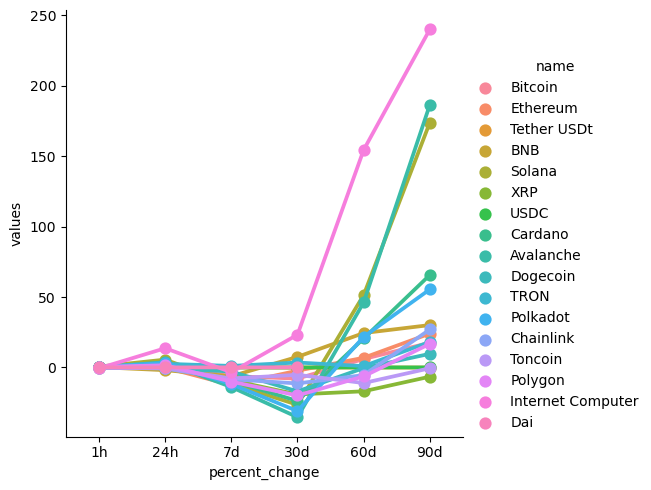

In [188]:
sns.catplot(data=df7.head(100), x="percent_change", y="values", hue="name", kind="point")

In [310]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

name  quote.USD.price                  timestamp
0  Bitcoin      40006.00574 2024-01-25 14:10:18.409629

<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

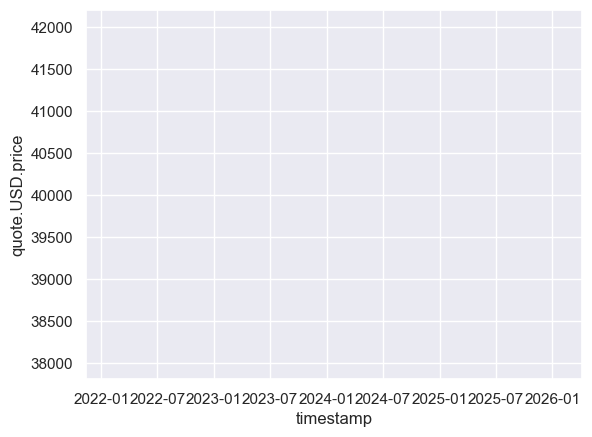

In [311]:
sns.set_theme(style="darkgrid")
sns.lineplot(x='timestamp', y = 'quote.USD.price', data= df10)